# Quick notebook to remind myself how to plot things in cartopy

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cartopy.feature as cfeature
from matplotlib.path import Path

## Basic stereographic map

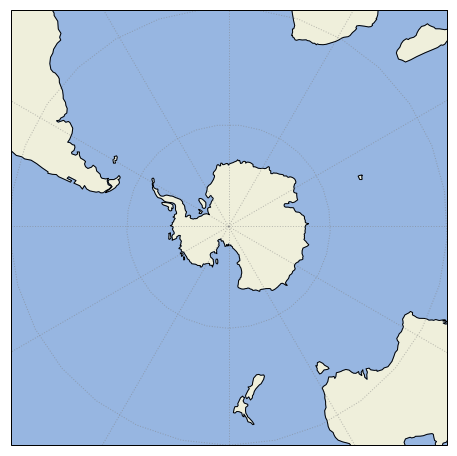

In [2]:
plt.figure(figsize=(12,8))

# change the central latitude to be -90, 
ax = plt.axes(projection=ccrs.Stereographic(central_latitude=-90))
# Limit the map to -30 degrees latitude and below. If we don't do this, get a global map
ax.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())

ax.coastlines()
# ax.stock_img()
# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

plt.show()

## Basic stereographic map with circular boundary

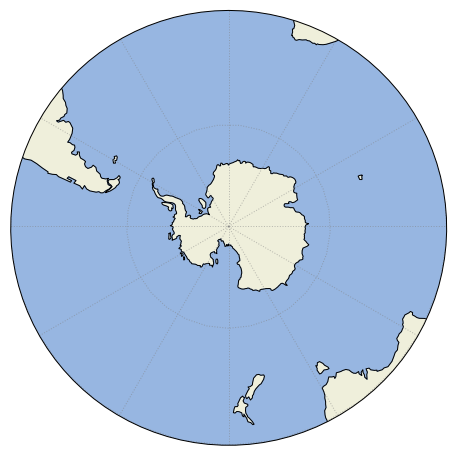

In [3]:
plt.figure(figsize=(12,8))

# change the central latitude to be -90, 
ax = plt.axes(projection=ccrs.Stereographic(central_latitude=-90))
# Limit the map to -30 degrees latitude and below. If we don't do this, get a global map
ax.set_extent([-180, 180, -90, -30], crs=ccrs.PlateCarree())

ax.coastlines()
# ax.stock_img()  # this doesn't work with a circular boundary.

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = Path(verts * radius + center)

ax.set_boundary(circle, transform=ax.transAxes)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)

plt.show()

With the definition which I originally copied. Have to define limit in the def though..

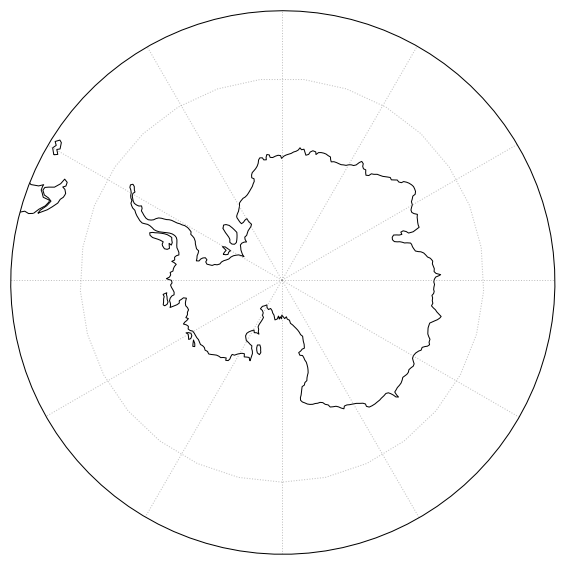

In [4]:
def define_map():

    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection=ccrs.Stereographic(central_latitude=-90))
    ax.set_extent([-180, 180, -90, -50], crs=ccrs.PlateCarree())
    ax.coastlines()

    # From example: http://scitools.org.uk/cartopy/docs/latest/examples/always_circular_stereo.html
#     http://scitools.org.uk/cartopy/docs/latest/gallery/always_circular_stereo.html#sphx-glr-gallery-always-circular-stereo-py
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    return(fig, ax)

fig, ax = define_map()
# plt.contour(lons,lats,data,5,transform=ccrs.PlateCarree(), cmap=plt.cm.Blues)
# plt.colorbar(fraction=0.05, shrink=0.9)
xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')


plt.show()

In [5]:
import cartopy
print(cartopy.__version__)

0.15.1


## More complex cartopy map

In [6]:
import xarray as xr

In [7]:
# read in file (ETOPO downsampled to 0.5°)
infile='/Users/nickywright/Data/Bathymetry_Topography/ETOPO/ETOPO1_Ice_g_gmt4_30m.grd'
f = xr.open_dataset(infile)

print(f)

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 721)
Coordinates:
  * lon      (lon) float64 -180.0 -179.5 -179.0 -178.5 -178.0 -177.5 -177.0 ...
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 -87.5 -87.0 -86.5 ...
Data variables:
    z        (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        
    history:      grdsample ETOPO1_Ice_g_gmt4.grd -I0.5d -GETOPO1_Ice_g_gmt4_...
    description:  
    GMT_version:  5.4.3 (r19528) [64-bit]


In [42]:
# assign lon/lat variables
lons = np.array(f.lon)
lats = np.array(f.lat)
data = np.array(f.z)

dlon = lons[1] - lons[0]
new_lons = np.concatenate((lons, lons[-1:] + dlon))
new_data = np.concatenate((data, data[:, 0:1]), axis=1)

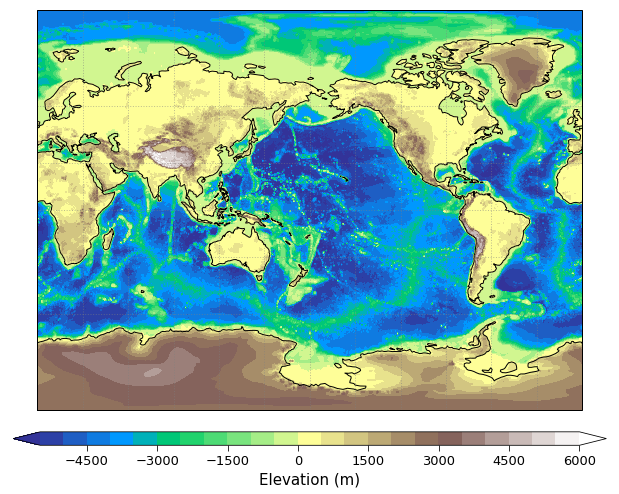

In [41]:
# --- plot using normal cartopy and with a cyclic point
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Miller(central_longitude=180))
ax.set_global()

cs = plt.contourf(new_lons, lats, new_data, transform=ccrs.PlateCarree(), levels=np.arange(-5500, 6500, 500),
                  cmap='terrain', extend='both')
ax.coastlines(color='black')

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax.gridlines(xlocs=xticks, ylocs=yticks,linewidth=1, color='gray', alpha=0.5, linestyle=':')

# colourbar
cbar = plt.colorbar(cs, orientation='horizontal', aspect=40, pad=0.05, extend='both', ax=ax, fraction=0.031)  # Add a color bar
cbar.ax.tick_params(labelsize=13, length=6)
cbar.set_label('Elevation (m)', fontsize=15)

plt.show()

## Plot using my own colormap

In [11]:
import gmtColormap
from matplotlib.colors import LinearSegmentedColormap

In [55]:
cptfile = '/Users/nickywright/Data/ColourPalettes/columbia.cpt'
cpt = gmtColormap.gmtColormap(cptfile)
palette = LinearSegmentedColormap('my_colormap', cpt)
palette.set_under('black')
palette.set_over('white')

/Users/nickywright/anaconda2/envs/python3/lib/python3.6/site-packages/xarray/core/dtypes.py:23: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if np.issubdtype(dtype, float):


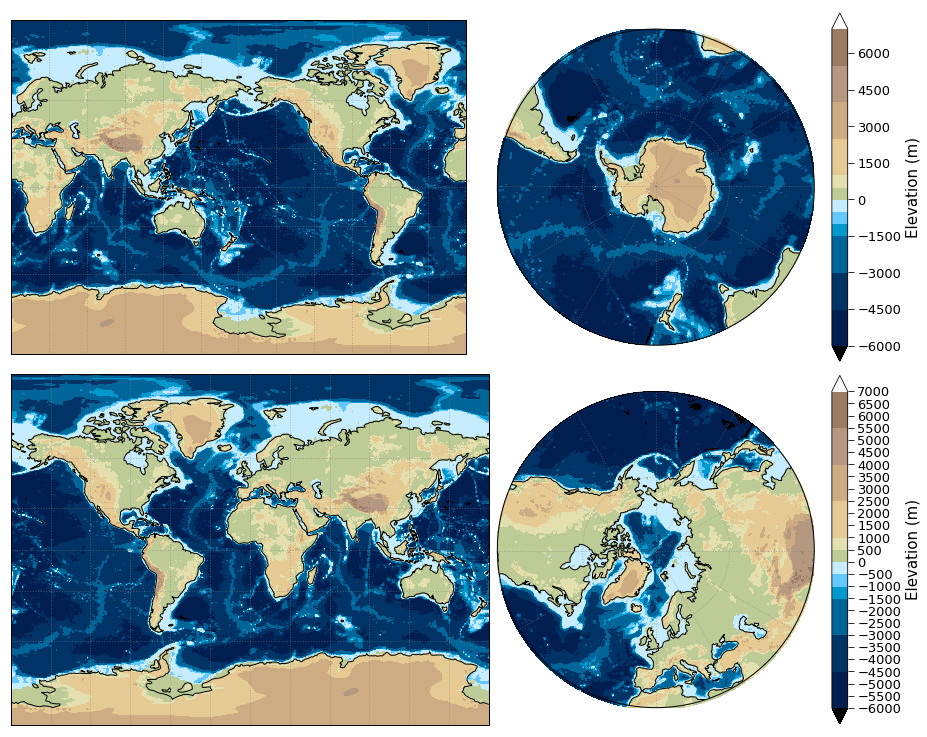

In [58]:
from matplotlib.gridspec import GridSpec
from matplotlib.path import Path

# --- set up subplot grids
gs = GridSpec(2, 2, height_ratios=[1,1], hspace=-0.5, width_ratios=[1.365,1], wspace=0.02)


# --- data to plot
lons = np.array(f.lon)
lats = np.array(f.lat)
data = np.array(f.z)

dlon = lons[1] - lons[0]
new_lons = np.concatenate((lons, lons[-1:] + dlon))
new_data = np.concatenate((data, data[:, 0:1]), axis=1)

z_contour_levels = np.arange(-6000, 7500, 500)

# -----------------------------------
fig = plt.figure(figsize=(15,20))

# --- part 1
ax1 = fig.add_subplot(gs[0,0], projection=ccrs.Miller(central_longitude=180))
cs = plt.contourf(new_lons, lats, new_data, transform=ccrs.PlateCarree(),  
                  levels=z_contour_levels, cmap=palette, extend='both')
ax1.coastlines()

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax1.gridlines(xlocs=xticks, ylocs=yticks, linewidth=1, color='gray', alpha=0.5, linestyle=':')

# --- plot part 2 (stereographic)
# create a subsection of the array (otherwise the stereographic plot will contain things outside the boundary)
y_max = -30.0
subarray_SH = f.where(f.lat <= y_max, drop=True)
lats_subarray_SH = np.array(subarray_SH.lat)
lons_subarray_SH = np.array(subarray_SH.lon)
data_subarray_SH = np.array(subarray_SH.z)

dlon_subarray_SH = lons_subarray_SH[1] - lons_subarray_SH[0]
new_lons_subarray_SH = np.concatenate((lons_subarray_SH, lons_subarray_SH[-1:] + dlon_subarray_SH))
new_data_subarray_SH = np.concatenate((data_subarray_SH, data_subarray_SH[:, 0:1]), axis=1)
# -----------------------------------

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.Stereographic(central_longitude=0, central_latitude=-90))
ax2.set_extent([-180, 180, -90, y_max], crs=ccrs.PlateCarree())

cs = plt.contourf(new_lons_subarray_SH, lats_subarray_SH, new_data_subarray_SH,
                  transform=ccrs.PlateCarree(),  levels=z_contour_levels,
                  cmap=palette, extend='both')
ax2.coastlines()

xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax2.gridlines(xlocs=xticks, ylocs=yticks, linewidth=1, color='gray', alpha=0.5, linestyle=':')

# change so that the map boundary is a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = Path(verts * radius + center)
ax2.set_boundary(circle, transform=ax2.transAxes)

# colourbar
cbar = plt.colorbar(cs, orientation='vertical', aspect=20, pad=0.05, extend='both', ax=ax2, fraction=0.0452)  # Add a color bar
cbar.ax.tick_params(labelsize=13, length=6)
cbar.set_label('Elevation (m)', fontsize=15)

# -----------------------------------
# --- plot part 3
ax3 = fig.add_subplot(gs[1,0], projection=ccrs.Miller(central_longitude=0))

cs = plt.contourf(new_lons, lats, new_data, transform=ccrs.PlateCarree(),  levels=z_contour_levels,
               cmap=palette, extend='both')
ax3.coastlines()

xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax3.gridlines(xlocs=xticks, ylocs=yticks, linewidth=1, color='gray', alpha=0.5, linestyle=':')

# -----------------------------------
# --- plot part 4 
# create a subsection of the array (otherwise the stereographic plot will contain things outside the boundary)
y_max = 30.0
subarray_NH = f.where(f.lat >= y_max, drop=True)
lats_subarray_NH = np.array(subarray_NH.lat)
lons_subarray_NH = np.array(subarray_NH.lon)
data_subarray_NH = np.array(subarray_NH.z)

dlon_subarray_NH = lons_subarray_NH[1] - lons_subarray_NH[0]
new_lons_subarray_NH = np.concatenate((lons_subarray_NH, lons_subarray_NH[-1:] + dlon_subarray_NH))
new_data_subarray_NH = np.concatenate((data_subarray_NH, data_subarray_NH[:, 0:1]), axis=1)
# -----------------------------------

# --- plot
ax4 = fig.add_subplot(gs[1,1], projection=ccrs.Stereographic(central_longitude=0, central_latitude=90))
ax4.set_extent([-180, 180, y_max, 90], crs=ccrs.PlateCarree())

cs = plt.contourf(new_lons_subarray_NH, lats_subarray_NH, new_data_subarray_NH, 
                  transform=ccrs.PlateCarree(),  levels=z_contour_levels,
                  cmap=palette, extend='both')
ax4.coastlines()

xticks = np.arange(-180, 190, 30)
yticks = np.arange(-90, 100, 30)
ax4.gridlines(xlocs=xticks, ylocs=yticks, linewidth=1, color='gray', alpha=0.5, linestyle=':')
plt.yticks()

# change so that the map boundary is a circle
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = Path(verts * radius + center)
ax4.set_boundary(circle, transform=ax4.transAxes)

# colourbar
cbar = plt.colorbar(cs, orientation='vertical', aspect=20, pad=0.05, extend='both', ax=ax4, fraction=0.0452)  # Add a color bar
cbar.ax.tick_params(labelsize=13, length=6)
cbar.set_ticks(z_contour_levels)
cbar.set_label('Elevation (m)', fontsize=15)

plt.show()

# Plot using basemap

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

/Users/nickywright/anaconda2/envs/python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1708: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/nickywright/anaconda2/envs/python3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1711: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

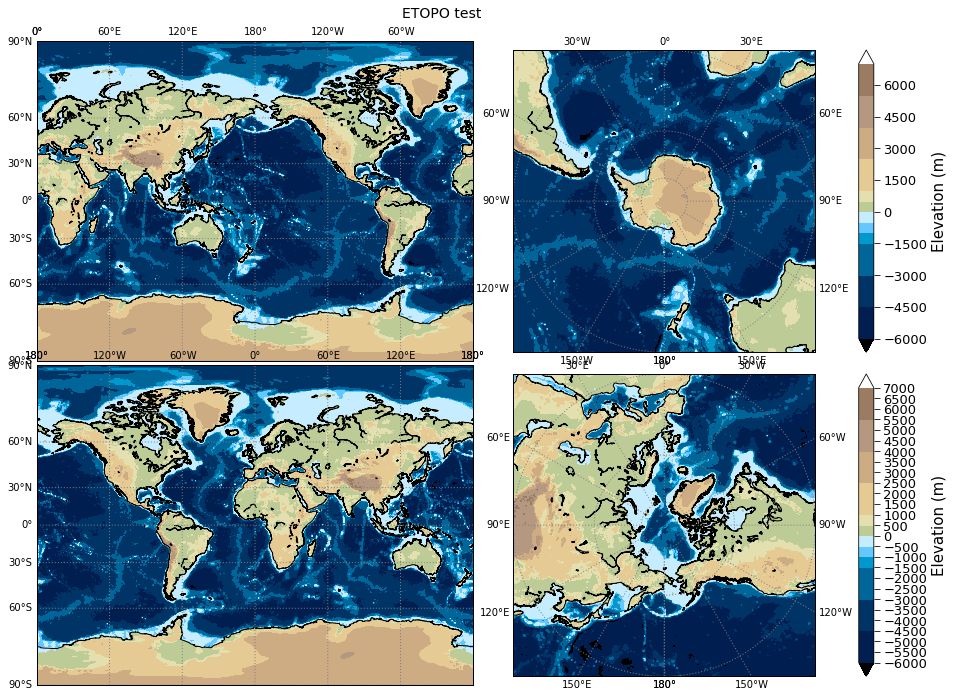

In [60]:
from mpl_toolkits.basemap import Basemap

# data to plot
lons = np.array(f.lon)
lats = np.array(f.lat)
data = np.array(f.z)

# add a cyclic point. 
dlon = lons[1] - lons[0]
new_lons = np.concatenate((lons, lons[-1:] + dlon))
new_data = np.concatenate((data, data[:, 0:1]), axis=1)

# make latlon a 2D array
x, y = np.meshgrid(new_lons, lats)

z_contour_levels = np.arange(-6000, 7500, 500)

# -----------------------------------
# --- new figure
fig = plt.figure(figsize=(15,20))
# set up subplot grids
gs = GridSpec(2, 2, height_ratios=[1,1], hspace=-0.55, width_ratios=[1.21,1], wspace=0.1)
ax1 = fig.add_subplot(gs[0,0])
st = fig.suptitle('ETOPO test', fontsize=14)
map = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=0.0, 
              urcrnrlon=360.0, lon_0=180, resolution='i', area_thresh=2000)

cs = map.contourf(x, y, new_data,  levels=z_contour_levels, cmap=palette, 
                  vmin=z_contour_levels[0], vmax=z_contour_levels[-1], 
                  latlon=True, extend='both')

map.drawcoastlines(linewidth=1)
map.drawmapboundary(linewidth=1)

# draw parallels.
parallels = np.arange(-90, 100, 30)
map.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, dashes=[1,2], color='gray')
# draw meridians
meridians = np.arange(-180, 190, 60)
map.drawmeridians(meridians, labels=[0,0,1,0], dashes=[1,2], color='gray')

# -- plot part 2
ax2 = fig.add_subplot(gs[0,1])
map2 = Basemap(projection='spstere', boundinglat=-30, lon_0=180, resolution='i', area_thresh=2000)
cs2 = map2.contourf(x, y, new_data,  levels=z_contour_levels, cmap=palette, latlon=True, extend='both')

map2.drawcoastlines(linewidth=1)
map2.drawmapboundary(linewidth=1)

# draw parallels.
parallels = np.arange(-90, 100, 30)
map2.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, dashes=[1,2], color='gray')
# draw meridians
meridians = np.arange(-180, 190, 30)
map2.drawmeridians(meridians, labels=[1,1,1,1], dashes=[1,2], color='gray')

# colourbar
cbar = map2.colorbar(cs2, location='right', pad=0.6, extend='both')  # Add a color bar
cbar.ax.tick_params(labelsize=13, length=6)
cbar.set_label('Elevation (m)', fontsize=15)

# --- part 3
ax3 = fig.add_subplot(gs[1,0])
map3 = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180.0,
               urcrnrlon=180.0, lon_0=0, resolution='i', area_thresh=2000)

# make latlon a 2D array
cs3 = map3.contourf(x, y, new_data,  levels=z_contour_levels, cmap=palette, 
                    vmin=z_contour_levels[0], vmax=z_contour_levels[-1], 
                    extend='both', latlon=True)
map3.drawcoastlines(linewidth=1)
map3.drawmapboundary(linewidth=1)

# draw parallels.
parallels = np.arange(-90, 100, 30)
map3.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, dashes=[1,2], color='gray')
# draw meridians
meridians = np.arange(-180, 190, 60)
map3.drawmeridians(meridians, labels=[0,0,1,0], dashes=[1,2], color='gray')

# -- plot part 2
ax4 = fig.add_subplot(gs[1,1])
map4 = Basemap(projection='npstere', boundinglat=30, lon_0=180, resolution='i', area_thresh=2000)
cs4 = map4.contourf(x, y, new_data,  levels=z_contour_levels, cmap=palette, 
                    vmin=z_contour_levels[0], vmax=z_contour_levels[-1], 
                    extend='both', latlon=True)
map4.drawcoastlines(linewidth=1)
map4.drawmapboundary(linewidth=1)

# draw parallels.
parallels = np.arange(-90, 100, 30)
map4.drawparallels(parallels, labels=[1,0,0,0], fontsize=10, dashes=[1,2], color='gray')
# draw meridians
meridians = np.arange(-180, 190, 30)
map4.drawmeridians(meridians, labels=[1,1,1,1], dashes=[1,2], color='gray')

# colourbar
cbar = map4.colorbar(cs4, location='right', pad=0.6, extend='both')  # Add a color bar
cbar.ax.tick_params(labelsize=13, length=6)
cbar.set_ticks(z_contour_levels)
cbar.set_label('Elevation (m)', fontsize=15)

# shift subplots down:
st.set_y(0.735)
fig.subplots_adjust(top=0.85)

plt.show()